<a href="https://colab.research.google.com/github/sudehashrafi/Machine-Learning-Course-UOIT/blob/main/auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

#Loading Data

I got the following block of code from the [dataset website](https://archive.ics.uci.edu/dataset/9/auto+mpg) from "Import in Python" part.


Quinlan,R.. (1993). Auto MPG. UCI Machine Learning Repository. https://doi.org/10.24432/C5859H.

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [ ]:
X

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


In [ ]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


#part a : Dropping Attributes

attribute "name" is not part of either X or y so we only need to drop "origin"



*   The axis=1 argument indicates that it's a column we are dropping
*   inplace = True, means that the operation will be performed directly on the DataFrame X, and the DataFrame will be modified in place.




In [ ]:
X.drop("origin", axis=1, inplace=True)

<ipython-input-21-5a8b30aec130>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop("origin", axis=1, inplace=True)


In [ ]:
#printing X to make sure "Origin" is dropped
X

,displacement,cylinders,horsepower,weight,acceleration,model_year
0,307.0,8,130.0,3504,12.0,70
1,350.0,8,165.0,3693,11.5,70
2,318.0,8,150.0,3436,11.0,70
3,304.0,8,150.0,3433,12.0,70
4,302.0,8,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82
394,97.0,4,52.0,2130,24.6,82
395,135.0,4,84.0,2295,11.6,82
396,120.0,4,79.0,2625,18.6,82


#Part b: handling missing values

first, we count the number of missing (NaN) values in each column


second, to fill the missing values with the average
horsepower for the respective number of cylinders, we group X by the "cylinders" column and selects the "horsepower" column. then we apply a transformation to each group of "horsepower" values within each group of "cylinders." we use a lambda function for this.

x represents a group of "horsepower" values within a specific "cylinders" group.
we fill the null values with the average value of the "horsepower" values within that group

In [ ]:
X.isna().sum()

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [ ]:
X["horsepower"] = X.groupby("cylinders")["horsepower"].transform(lambda x: x.fillna(x.mean()))

<ipython-input-24-dc5314a51aa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["horsepower"] = X.groupby("cylinders")["horsepower"].transform(lambda x: x.fillna(x.mean()))


#Part C: handling "year" attribute

Adding 1900 so that the year has four digits

In [ ]:
X["model_year"] = X["model_year"] + 1900

<ipython-input-25-fcb51abdb9b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["model_year"] = X["model_year"] + 1900


In [ ]:
X

,displacement,cylinders,horsepower,weight,acceleration,model_year
0,307.0,8,130.0,3504,12.0,1970
1,350.0,8,165.0,3693,11.5,1970
2,318.0,8,150.0,3436,11.0,1970
3,304.0,8,150.0,3433,12.0,1970
4,302.0,8,140.0,3449,10.5,1970
...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,1982
394,97.0,4,52.0,2130,24.6,1982
395,135.0,4,84.0,2295,11.6,1982
396,120.0,4,79.0,2625,18.6,1982


In [ ]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


#Train/ Test Split

we want to Split the data into 50% training and 50% validation sets so test_size=0.5


we set random_state to 42 to produce the same results across different runs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#Training the model

training a DNN that predicts the mpg of vehicles

there is no need for an activation function such as softmax in the last layer as it is a regressio task

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='linear'),
    layers.Dense(1)
])

as it is a regression task I used "mean_absolute_error" as my loss function.
it computes the average absolute difference between the actual (observed) values and the predicted values so minimizing this loss function during training encourages the model to make predictions that are more close to the true values.

In [ ]:
model.compile(optimizer='adam', loss='mean_absolute_error')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 30ms/step - loss: 81.3122 - val_loss: 17.7883
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 41.5868 - val_loss: 49.0046
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 26.3175 - val_loss: 23.4833
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 17.4675 - val_loss: 5.8318
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 8.4712 - val_loss: 5.7445
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 7.6702 - val_loss: 5.8175
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 6.8191 - val_loss: 15.1584
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 17.1814 - val_loss: 20.5242
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 15.2177 - val_loss: 14.6382
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 15.5533 - val_loss: 12.7231
Epoch 11/1

the following plots show the distribution of the features in the training dataset

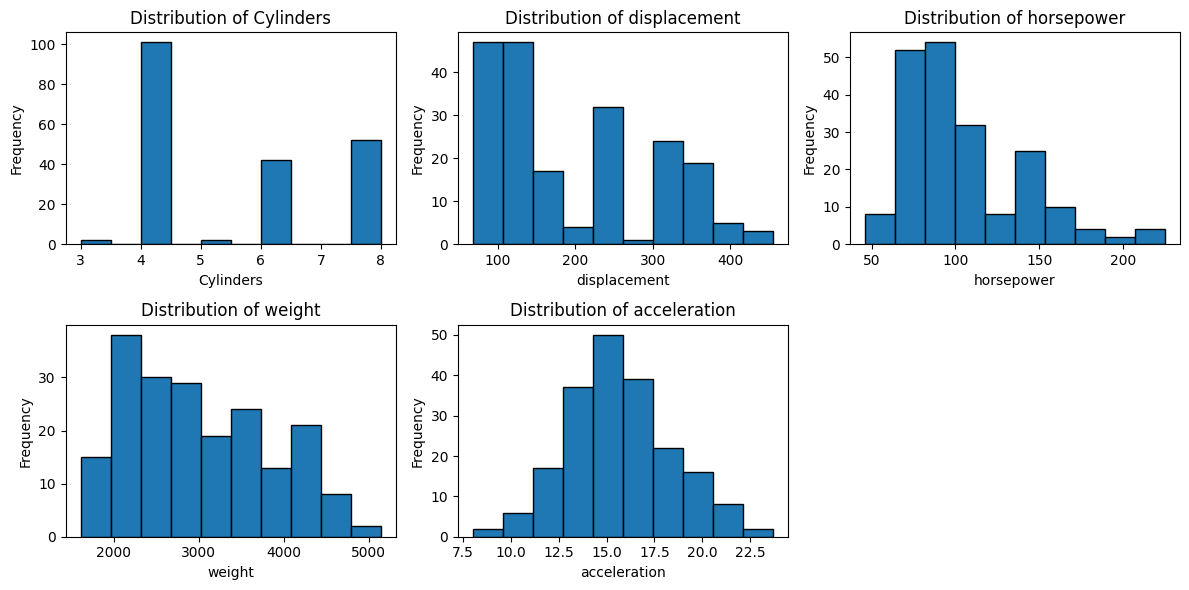

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.hist(X_train['cylinders'], bins=10, edgecolor='k')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title('Distribution of Cylinders')


plt.subplot(2, 3, 2)
plt.hist(X_train['displacement'], bins=10, edgecolor='k')
plt.xlabel('displacement')
plt.ylabel('Frequency')
plt.title('Distribution of displacement')


plt.subplot(2, 3, 3)
plt.hist(X_train['horsepower'], bins=10, edgecolor='k')
plt.xlabel('horsepower')
plt.ylabel('Frequency')
plt.title('Distribution of horsepower')


plt.subplot(2, 3, 4)
plt.hist(X_train['weight'], bins=10, edgecolor='k')
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.title('Distribution of weight')

plt.subplot(2, 3, 5)
plt.hist(X_train['acceleration'], bins=10, edgecolor='k')
plt.xlabel('acceleration')
plt.ylabel('Frequency')
plt.title('Distribution of acceleration')


plt.tight_layout()
plt.show()

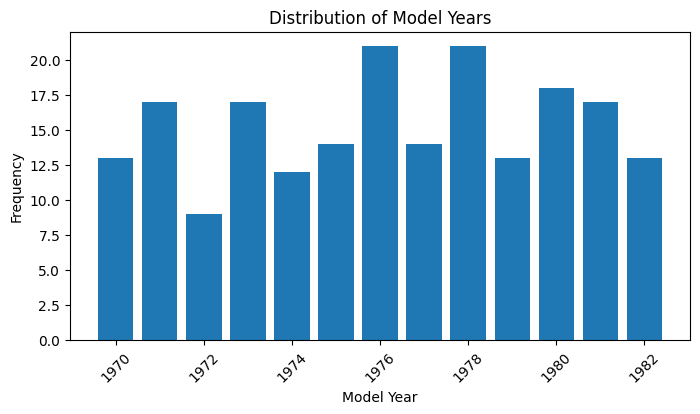

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(X_train['model_year'].value_counts().index, X_train['model_year'].value_counts())
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.title('Distribution of Model Years')
plt.xticks(rotation=45)
plt.show()

#correlations between features and the target variable

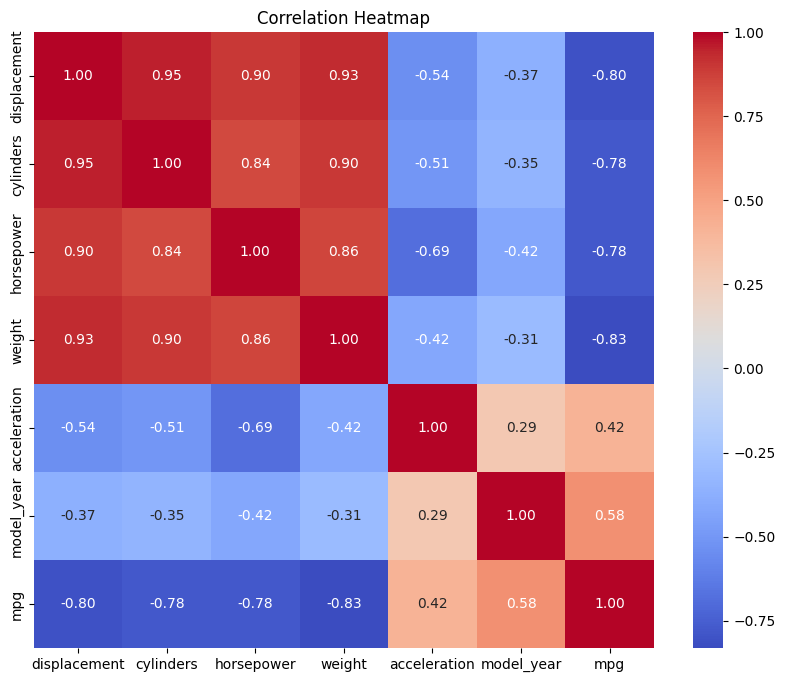

weight          0.831741
displacement    0.804203
horsepower      0.775608
cylinders       0.775396
model_year      0.579267
acceleration    0.420289
Name: mpg, dtype: float64


In [ ]:

df = pd.DataFrame(X)
df['mpg'] = y['mpg']

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

correlation_with_target = correlation_matrix['mpg'].drop('mpg')  # Drop the target variable itself

# Sort correlations in descending order to see the most correlated features
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Print or visualize the correlation values
print(sorted_correlation)


#Part f : predicting the mpg

first I created a dataframe of the new vehicles listed in the assignment file so I can give it as an input for the prediction

In [ ]:
new_vehicles_data = pd.DataFrame({
    'Cylinders': [6, 12, 8, 8, 4, 6, 3, 3, 4, 4],
    'displacement': [2170, 6498, 3902, 6162, 122, 3232, 598, 900, 1189, 201],
    'horsepower': [502, 730, 986, 670, 181, 155, 89, 50, 60, 40],
    'weight': [3164, 3472, 3020, 3721, 2496, 3232, 1550, 642, 2355, 2265],
    'acceleration': [4.2, 3.2, 2.5, 2.6, 8.3, 11.5, 10.1, 5.8, 28.1, 32],
    'year': [2023, 2023, 2023, 2023, 2023, 1969, 2023, 2023, 1964, 1908]
})

In [ ]:
predictions = model.predict(new_vehicles_data)

1/1 [==============================] - 0s 62ms/step


I created a list called predicted_mpg by iterating over each prediction value in the predictions list.

For each prediction value we Convert the prediction which is NumPy array to a float data type and then round the float value to two decimal places.

then we add a new column called "Predicted MPG" to new_vehicles_data which values are the values of "predicted_mpg" list.

In [ ]:
predicted_mpg = [round(float(prediction), 2) for prediction in predictions]
new_vehicles_data['Predicted MPG'] = predicted_mpg
print(new_vehicles_data[['Cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'Predicted MPG']])

   Cylinders  displacement  horsepower  weight  acceleration  year  \
0          6          2170         502    3164           4.2  2023   
1         12          6498         730    3472           3.2  2023   
2          8          3902         986    3020           2.5  2023   
3          8          6162         670    3721           2.6  2023   
4          4           122         181    2496           8.3  2023   
5          6          3232         155    3232          11.5  1969   
6          3           598          89    1550          10.1  2023   
7          3           900          50     642           5.8  2023   
8          4          1189          60    2355          28.1  1964   
9          4           201          40    2265          32.0  1908   

   Predicted MPG  
0          92.70  
1         135.52  
2         131.58  
3         153.16  
4          21.16  
5          93.06  
6          55.06  
7          48.73  
8          52.37  
9          27.28  


In [ ]:
#model prediction:
#  Predicted MPG
#0          92.70
#1         135.52
#2         131.58
#3         153.16
#4          21.16
#5          93.06
#6          55.06
#7          48.73
#8          52.37
#9          27.28

In [ ]:
validation_losses = history.history['val_loss']
avg_val_loss = np.mean(validation_losses)
print(f'average validation loss: {avg_val_loss:.4f}')

average validation loss: 8.5998


#Rationale for the model's prediction

In [ ]:
#we trained a DNN model and we used MAE as the loss function (the reason is mentioned previously)

#after prediction, we achieved the average validation loss of 8.5
#which demonstrates that on average the difference between the predicted value and the real value is around 8.5 units

#from the plots of feature distributions in the dataset we can observe a skewed distribution of "Cylinders" feature
#which indicates that certain cylinder counts are much more common in the dataset than others.
#This could impact the model's ability to generalize to less common cylinder counts. (Data Imbalance)

#from the "correlations between features and the target variable" part we can also see that the correlation between some variables such as
#"acceleration" or "model_year" is so low with the target variable. having features with low correlation can limit predictive power